# PROJECT NAME - SENTIMENTAL ANALYSIS BY USING NLP

#                      i) what is Sentimental Analysis - is the field that tries to give machines and computer software the ability to understand the emotions of the user or people

# ii) NLP(Natural Language Processing) - A machine learning called natural language processing(NLP) enables computers to understand, manipulate,and analyze human language

# iii) Models 

# STEP 1 - IMOPRT ALL LIBRARIES OR MODELS

In [7]:
# For the project i using python 3 download in the jupyter notebook
# For the projct using dataset  download from the kaggle.com
# The name of dataset i am using is "AllProductReviews" by Amazon

# In below i imported important libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import string

%matplotlib inline

plt.style.use('ggplot')



In [2]:
!pip install nltk

In [2]:
# nltk - natural languaging tool kit
# nlkt used in natural language pocess
import nltk 

In [5]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# STEP 2 UPLOAD DATA SET  FILES

In [4]:
# read the data
data =pd.read_csv("C:\\Users\\sande\\OneDrive\\Desktop\\my folder\\AllProductReviews.csv")

pro = pd.read_csv("C:\\Users\\sande\\OneDrive\\Desktop\\my folder\\ProductInfo.csv")

In [9]:
data.head()  # showing the first five data list

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [10]:
pro.head()

,MRP,Price,ProductFullName,ProductShortName,ReviewURL,id
0,2990,1399,boAt Rockerz 255 Sports Bluetooth Wireless Ear...,boAt Rockerz 255,https://www.amazon.in/255-Bluetooth-Wireless-E...,1
1,3999,1099,Flybot Wave in-Ear Sport Wireless Bluetooth Ea...,Flybot Wave,https://www.amazon.in/Flybot-Wireless-Bluetoot...,2
2,3999,1099,Flybot Boom Deep Bass in-Ear Wireless Bluetoot...,Flybot Boom,https://www.amazon.in/Flybot-Wireless-Bluetoot...,3
3,2000,749,PTron Intunes Pro Headphone Magnetic Earphone ...,PTron Intunes,https://www.amazon.in/PTron-Intunes-Pro-Smartp...,4
4,5999,2999,Flybot Beat True Wireless Bluetooth Earphones ...,Flybot Beat,https://www.amazon.in/Flybot-Wireless-Bluetoot...,5


# Showing saparet Data

In [11]:
data['ReviewTitle']

0                   Honest review of an edm music lover\n
1                   Unreliable earphones with high cost\n
2                              Really good and durable.\n
3                       stopped working in just 14 days\n
4        Just Awesome Wireless Headphone under 1000...😉\n
                               ...                       
14332                                              Good\n
14333                                   Amazing Product\n
14334                                           Not bad\n
14335                                    a good product\n
14336             Average headphones , n overrated name\n
Name: ReviewTitle, Length: 14337, dtype: object

In [12]:
data['ReviewBody']

0        No doubt it has a great bass and to a great ex...
1        This  earphones are unreliable, i bought it be...
2        i bought itfor 999,I purchased it second time,...
3        Its sound quality is adorable. overall it was ...
4        Its Awesome... Good sound quality & 8-9 hrs ba...
                               ...                        
14332                                               Good\n
14333               An amazing product but a bit costly.\n
14334                                              Sound\n
14335    the sound is good battery life is good but the...
14336    M writing this review after using for almost 7...
Name: ReviewBody, Length: 14337, dtype: object

In [13]:
data['ReviewStar']

0        3
1        1
2        4
3        1
4        5
        ..
14332    4
14333    5
14334    1
14335    5
14336    1
Name: ReviewStar, Length: 14337, dtype: int64

In [14]:
data['Product']

0        boAt Rockerz 255
1        boAt Rockerz 255
2        boAt Rockerz 255
3        boAt Rockerz 255
4        boAt Rockerz 255
               ...       
14332          JBL T110BT
14333          JBL T110BT
14334          JBL T110BT
14335          JBL T110BT
14336          JBL T110BT
Name: Product, Length: 14337, dtype: object

# Total Size of Dataset

In [15]:
print(data.shape)   # size of data set.
# first show rows and second columns.


(14337, 4)


In [5]:
# showing first 1000 data 
data = data.head(1000)
print(data.shape)

(1000, 4)


In [16]:
data.describe()

,ReviewStar
count,14337.000000
mean,3.675874
std,1.503409
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


# Preprocessing the dataset 

In [6]:

# removes pattern in input text
def remove_pattern(input_txt , pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word , "",input_txt)
    return input_txt

In [8]:
# remove the short wordsli
data['ReviewTitle'] = data['ReviewTitle'].apply(lambda x : " ".join([w for w in x.split() if len(w)>3]))
data.head()

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review music lover,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good durable.,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working just days,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [9]:
# remove the short wordsli
data['ReviewBody'] = data['ReviewBody'].apply(lambda x : " ".join([w for w in x.split() if len(w)>3]))
data.head()

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review music lover,doubt great bass great extent noise cancellati...,3,boAt Rockerz 255
1,Unreliable earphones with high cost,"This earphones unreliable, bought before days ...",1,boAt Rockerz 255
2,Really good durable.,"bought itfor 999,I purchased second time, gift...",4,boAt Rockerz 255
3,stopped working just days,sound quality adorable. overall good just week...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉,Awesome... Good sound quality battery life... ...,5,boAt Rockerz 255


In [4]:
# indivisual words considered as tokens
tokenized_Data = data['ReviewTitle'].apply(lambda x : x.split())
tokenized_Data.head()

0          [Honest, review, of, an, edm, music, lover]
1            [Unreliable, earphones, with, high, cost]
2                        [Really, good, and, durable.]
3               [stopped, working, in, just, 14, days]
4    [Just, Awesome, Wireless, Headphone, under, 10...
Name: ReviewTitle, dtype: object

In [7]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_Data = tokenized_Data.apply(lambda sentence : [stemmer.stem(word) for word in sentence])
tokenized_Data.head()

0          [honest, review, of, an, edm, music, lover]
1                  [unreli, earphon, with, high, cost]
2                        [realli, good, and, durable.]
3                      [stop, work, in, just, 14, day]
4    [just, awesom, wireless, headphon, under, 1000...
Name: ReviewTitle, dtype: object

In [9]:
# Combine words into single sentence
for i in range(len(tokenized_Data)):
    tokenized_Data[i] = " ".join(tokenized_Data[i])
    
data['ReivewTitle'] = tokenized_Data
data.head()

,ReviewTitle,ReviewBody,ReviewStar,Product,ReivewTitle
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,h o n e s t r e v i e w o f a n e d m ...
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,u n r e l i e a r p h o n w i t h h i g ...
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,r e a l l i g o o d a n d d u r a b l e .
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,s t o p w o r k i n j u s t 1 4 d a y
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,j u s t a w e s o m w i r e l e s s h e ...


# Exploratory Data Analysis 

In [10]:
!pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 1.8 MB/s eta 0:00:00


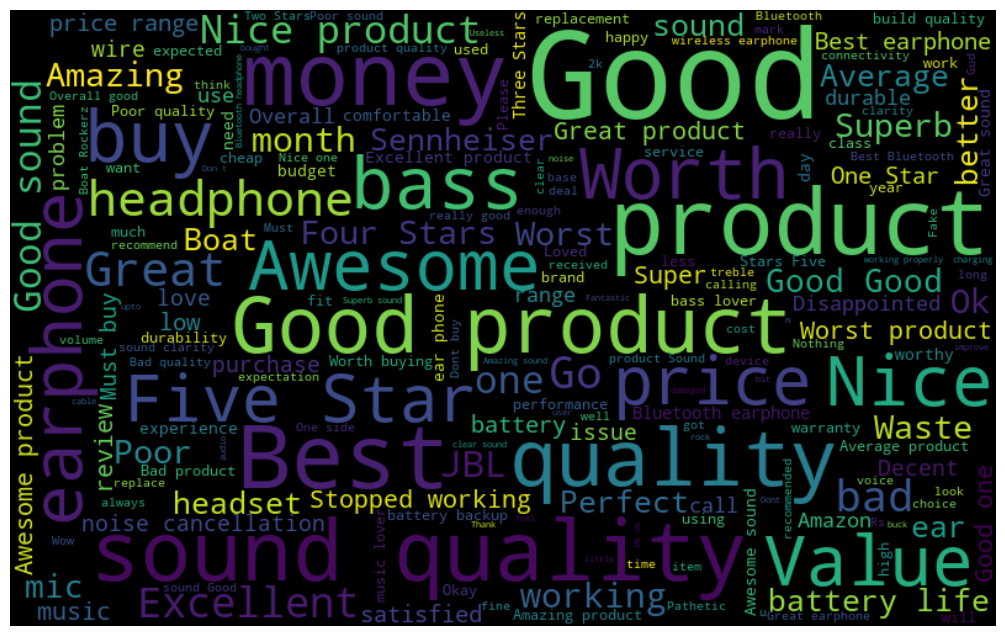

In [13]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in data['ReviewTitle']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500, random_state = 42 , max_font_size = 100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [15]:
# extract the hastag
def hashtag_extract(ReviewTitle):
    hashtags = []
    # Loop words in the dataset
    for ReviewTitle in ReviewTitle:
        ht = re.findall(r"#(\w+)", ReviewTitle)
        hashtags.append(ht)
    return hashtags

In [26]:
# extract hastags from non-racist/sexist review
ht_positive = hashtag_extract(data['ReviewTitle'][data['ReviewStar']==0])

# extract hashtags from racist/sexist reviews
ht_negative = hashtag_extract(data['ReviewTitle'][data['ReviewStar']==1])

# Checking Uunique Values

In [17]:
data.nunique()

ReviewTitle     9342
ReviewBody     13012
ReviewStar         5
Product           10
dtype: int64

# Check separately Unique value

In [18]:
data['ReviewStar'].unique()

array([3, 1, 4, 5, 2], dtype=int64)

In [19]:
data['Product'].unique()

array(['boAt Rockerz 255', 'Flybot Wave', 'Flybot Boom', 'PTron Intunes',
       'Flybot Beat', 'Samsung EO-BG950CBEIN', 'JBL T205BT',
       'Sennheiser CX 6.0BT', 'Skullcandy S2PGHW-174', 'JBL T110BT'],
      dtype=object)

# Find the Missing or Null Value

In [20]:
data.isna().sum()

ReviewTitle    0
ReviewBody     0
ReviewStar     0
Product        0
dtype: int64

In [21]:
pro.isna().sum()

MRP                 0
Price               0
ProductFullName     0
ProductShortName    0
ReviewURL           0
id                  0
dtype: int64

# check  duplicate

In [22]:
data.duplicated().any()

True

In [23]:
data.drop_duplicates()

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255
...,...,...,...,...
14331,Bad performance\n,Very bad sound call quality very bad no bass\n,1,JBL T110BT
14333,Amazing Product\n,An amazing product but a bit costly.\n,5,JBL T110BT
14334,Not bad\n,Sound\n,1,JBL T110BT
14335,a good product\n,the sound is good battery life is good but the...,5,JBL T110BT


In [24]:
data.drop_duplicates(subset = ['ReviewBody'])

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255
...,...,...,...,...
14331,Bad performance\n,Very bad sound call quality very bad no bass\n,1,JBL T110BT
14333,Amazing Product\n,An amazing product but a bit costly.\n,5,JBL T110BT
14334,Not bad\n,Sound\n,1,JBL T110BT
14335,a good product\n,the sound is good battery life is good but the...,5,JBL T110BT


In [25]:
data.drop_duplicates(subset = ["ReviewTitle"])

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255
...,...,...,...,...
14328,Quallity maintain is good\n,Very good product in good price\n,5,JBL T110BT
14329,It's from jbl or road side product!? Magic ...,Don't buy it it's horrible not connecting with...,1,JBL T110BT
14331,Bad performance\n,Very bad sound call quality very bad no bass\n,1,JBL T110BT
14335,a good product\n,the sound is good battery life is good but the...,5,JBL T110BT


In [26]:
print(data.shape)

(14337, 4)


# Count Word

In [12]:
def no_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count


In [13]:
data['word_count'] = data['ReviewBody'].apply(no_of_words)

# Review Distribution

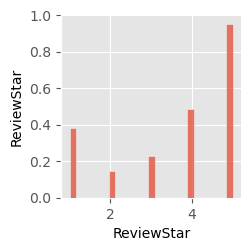

In [27]:
sns.pairplot(data)

<Axes: xlabel='ReviewStar', ylabel='Count'>

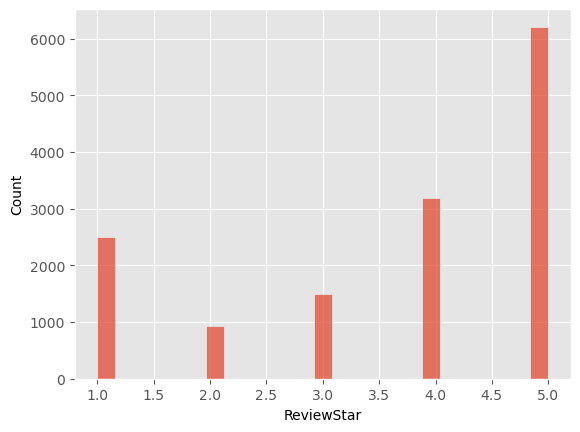

In [28]:
sns.histplot(data['ReviewStar'])

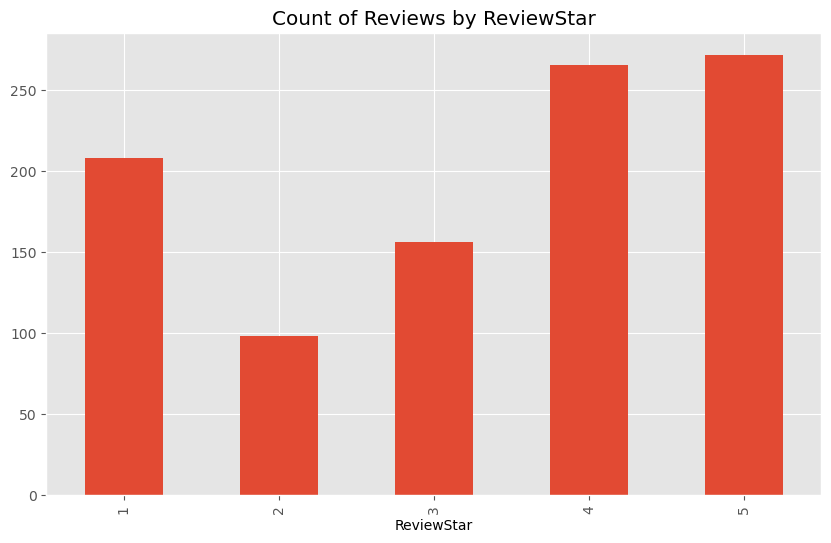

In [16]:
axis = data['ReviewStar'].value_counts().sort_index().plot(
        kind = 'bar', title = 'Count of Reviews by ReviewStar',
            figsize = (10,6))
axis.set_xlabel("ReviewStar")
plt.show()

# Basic NLTK

In [13]:
example = data['ReviewTitle'][50]
print(example)

Worth the price , best quality, IPx5 instead of IPx4



In [14]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Worth', 'the', 'price', ',', 'best', 'quality', ',', 'IPx5', 'instead', 'of']

In [15]:
tagged = nltk.pos_tag(tokens)
print(tagged)

[('Worth', 'IN'), ('the', 'DT'), ('price', 'NN'), (',', ','), ('best', 'JJS'), ('quality', 'NN'), (',', ','), ('IPx5', 'NNP'), ('instead', 'RB'), ('of', 'IN'), ('IPx4', 'NNP')]


In [16]:
note = nltk.chunk.ne_chunk(tagged)
note.pprint()

(S
  Worth/IN
  the/DT
  price/NN
  ,/,
  best/JJS
  quality/NN
  ,/,
  (ORGANIZATION IPx5/NNP)
  instead/RB
  of/IN
  (ORGANIZATION IPx4/NNP))


# STEP 3 - VADAR seniment scoring 

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

Sia = SentimentIntensityAnalyzer()

In [18]:
Sia.polarity_scores('This product is very good')

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}

In [19]:
Sia.polarity_scores('This product is very bad')

{'neg': 0.487, 'neu': 0.513, 'pos': 0.0, 'compound': -0.5849}

In [20]:
Sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'compound': 0.7269}

In [21]:

data

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255
...,...,...,...,...
995,Value for money\n,It's a good Bluetooth headphones in its price ...,5,boAt Rockerz 255
996,Satisfied\n,"Sound loudness is ok, clarity is also ok but n...",3,boAt Rockerz 255
997,Best product .\n,Love it soooo good batter ......awsome soung Q...,4,boAt Rockerz 255
998,This is Good For Entertainment Not for calling\n,Bass 9/10Vocal 8/10Comfort 9/10Bluetooth conne...,5,boAt Rockerz 255


In [22]:
# Run the polarity score on the entire dataset
result={}
for i, row in tqdm(data.iterrows(),total=len(data)):
    product = row['ReviewBody']
    myid = row["ReviewTitle"]
    result[myid]=Sia.polarity_scores(product)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [23]:
result

{'Honest review of an edm music lover\n': {'neg': 0.268,
  'neu': 0.657,
  'pos': 0.075,
  'compound': -0.958},
 'Unreliable earphones with high cost\n': {'neg': 0.073,
  'neu': 0.884,
  'pos': 0.043,
  'compound': -0.2528},
 'Really good and durable.\n': {'neg': 0.021,
  'neu': 0.928,
  'pos': 0.052,
  'compound': 0.5569},
 'stopped working in just 14 days\n': {'neg': 0.061,
  'neu': 0.833,
  'pos': 0.105,
  'compound': 0.1779},
 'Just Awesome Wireless Headphone under 1000...😉\n': {'neg': 0.093,
  'neu': 0.76,
  'pos': 0.147,
  'compound': 0.2831},
 'Charging port not working\n': {'neg': 0.0,
  'neu': 0.918,
  'pos': 0.082,
  'compound': 0.5122},
 'Loved the color and sound !!\n': {'neg': 0.025,
  'neu': 0.721,
  'pos': 0.255,
  'compound': 0.9607},
 'Great sound with worst mic.\n': {'neg': 0.132,
  'neu': 0.868,
  'pos': 0.0,
  'compound': -0.5849},
 'Battery life is good enough to keep going all day\n': {'neg': 0.0,
  'neu': 0.763,
  'pos': 0.237,
  'compound': 0.9685},
 'Very very 

In [24]:
pd.DataFrame(result).T

,neg,neu,pos,compound
Honest review of an edm music lover\n,0.268,0.657,0.075,-0.9580
Unreliable earphones with high cost\n,0.073,0.884,0.043,-0.2528
Really good and durable.\n,0.021,0.928,0.052,0.5569
stopped working in just 14 days\n,0.061,0.833,0.105,0.1779
Just Awesome Wireless Headphone under 1000...😉\n,0.093,0.760,0.147,0.2831
...,...,...,...,...
Reviewing after the product got dead after 8months use\n,0.279,0.619,0.102,-0.8580
Stopped working after 1 month\n,0.063,0.831,0.106,0.3167
Best product .\n,0.000,0.665,0.335,0.8910
This is Good For Entertainment Not for calling\n,0.000,0.823,0.177,0.6249


In [25]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index':'ReviewTitle'})
vaders = vaders.merge(data,how='right')

In [26]:
vaders.head()

,ReviewTitle,neg,neu,pos,compound,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,0.268,0.657,0.075,-0.9580,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,0.073,0.884,0.043,-0.2528,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,0.021,0.928,0.052,0.5569,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,0.061,0.833,0.105,0.1779,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,0.093,0.760,0.147,0.2831,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


# PLOT VADER  RESULTS

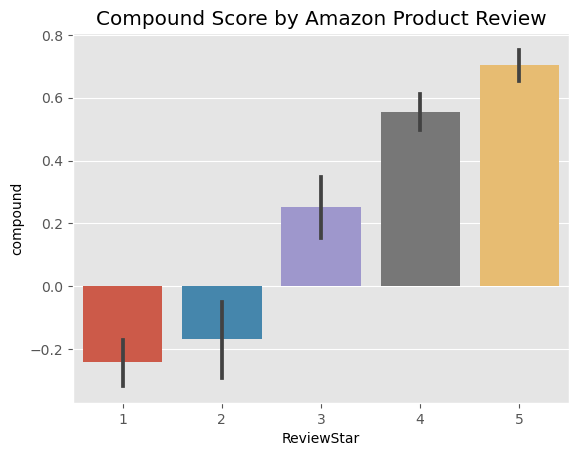

In [27]:
Axis = sns.barplot(data=vaders, x='ReviewStar', y = 'compound')
Axis.set_title('Compound Score by Amazon Product Review')
plt.show()

<Axes: xlabel='ReviewStar', ylabel='pos'>

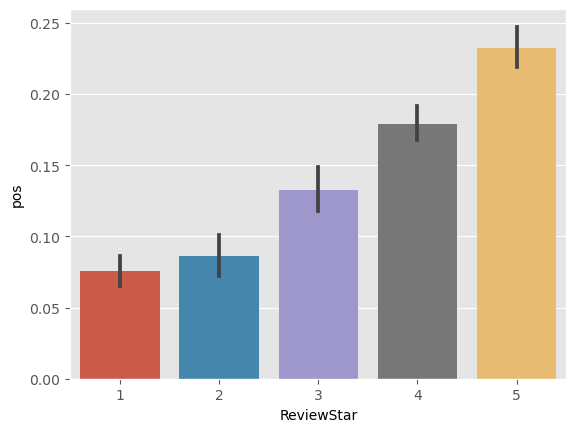

In [28]:
sns.barplot(data=vaders, x='ReviewStar',y='pos')

<Axes: xlabel='ReviewStar', ylabel='neu'>

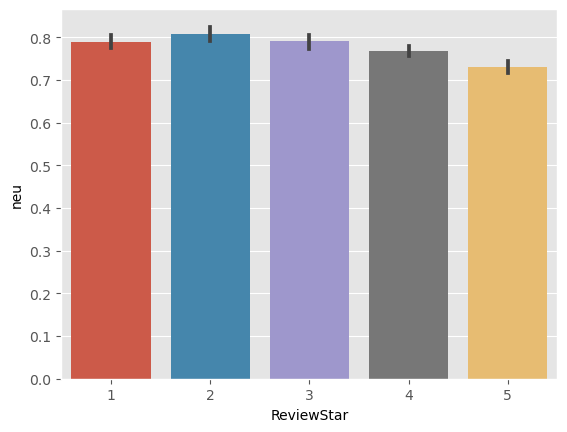

In [29]:
sns.barplot(data=vaders, x='ReviewStar',y='neu')

<Axes: xlabel='ReviewStar', ylabel='neg'>

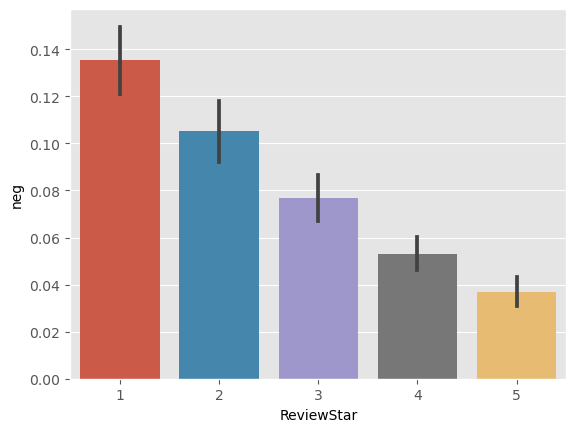

In [30]:
sns.barplot(data=vaders, x='ReviewStar',y='neg')

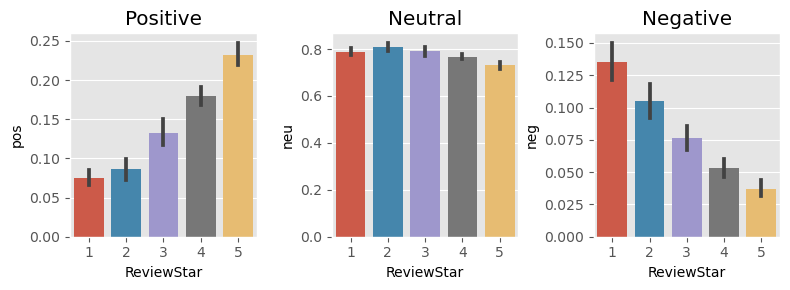

In [31]:
fig, Axis = plt.subplots(1,3,figsize=(8,3))
sns.barplot(data=vaders, x='ReviewStar', y='pos',ax=Axis[0])
sns.barplot(data=vaders, x='ReviewStar', y='neu',ax=Axis[1])
sns.barplot(data=vaders, x='ReviewStar', y='neg',ax=Axis[2])
Axis[0].set_title('Positive')
Axis[1].set_title('Neutral')
Axis[2].set_title('Negative')
plt.tight_layout()
plt.show()

# STEP 3 - Roberta Pretrained Model


In [32]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

In [33]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [34]:
from scipy.special import softmax

In [35]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [36]:
print(example)
Sia.polarity_scores(example)

Worth the price , best quality, IPx5 instead of IPx4



{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'compound': 0.7269}

In [37]:
encoded_text = tokenizer(example,return_tensors = 'pt')
output = model(**encoded_text)
ReviewStar = output[0][0].detach().numpy()
ReviewStar = softmax(ReviewStar)
ReviewStar_dict = {
    'roberta_neg' : ReviewStar[0],
    'roberta_neu' : ReviewStar[1],
    'roberta_pos' : ReviewStar[2]
}
print(ReviewStar_dict)

{'roberta_neg': 0.0232482, 'roberta_neu': 0.3349176, 'roberta_pos': 0.64183426}


In [38]:
def polarity_scores_roberta(expample):
    encoded_text = tokenizer(example,return_tensors = 'pt')
    output = model(**encoded_text)
    ReviewStar = output[0][0].detach().numpy()
    ReviewStar = softmax(ReviewStar)
    ReviewStar_dict = {
        'roberta_neg' : ReviewStar[0],
        'roberta_neu' : ReviewStar[1],
        'roberta_pos' : ReviewStar[2]
    }
    return ReviewStar_dict
    

In [46]:
result={}
for i, row in tqdm(data.iterrows(),total=len(data)):
    product = row['ReviewBody']
    myid = row["ReviewTitle"]
    vader_result = Sia.polarity_scores(product)
    
    roberta_result = polarity_scores_roberta(product)
    both ={**vader_result, **roberta_result}
    result[myid] = both

  0%|          | 0/1000 [00:00<?, ?it/s]

In [52]:
both ={**vader_result, **roberta_result}

In [53]:
both

{'neg': 0.0,
 'neu': 0.756,
 'pos': 0.244,
 'compound': 0.4404,
 'roberta_neg': 0.0232482,
 'roberta_neu': 0.3349176,
 'roberta_pos': 0.64183426}

In [66]:
results_df = pd.DataFrame(result).T
results_df = results_df.reset_index().rename(columns={'index':'ReviewTitle'})
results_df = results_df.merge(data,how='right')

In [67]:
results_df.head()

,ReviewTitle,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,0.268,0.657,0.075,-0.9580,0.023248,0.334918,0.641834,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,0.073,0.884,0.043,-0.2528,0.023248,0.334918,0.641834,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,0.021,0.928,0.052,0.5569,0.023248,0.334918,0.641834,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,0.061,0.833,0.105,0.1779,0.023248,0.334918,0.641834,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,0.093,0.760,0.147,0.2831,0.023248,0.334918,0.641834,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [68]:
results_df.columns

Index(['ReviewTitle', 'neg', 'neu', 'pos', 'compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos', 'ReviewBody', 'ReviewStar', 'Product'],
      dtype='object')

# STEP 4 - Combine and Compare

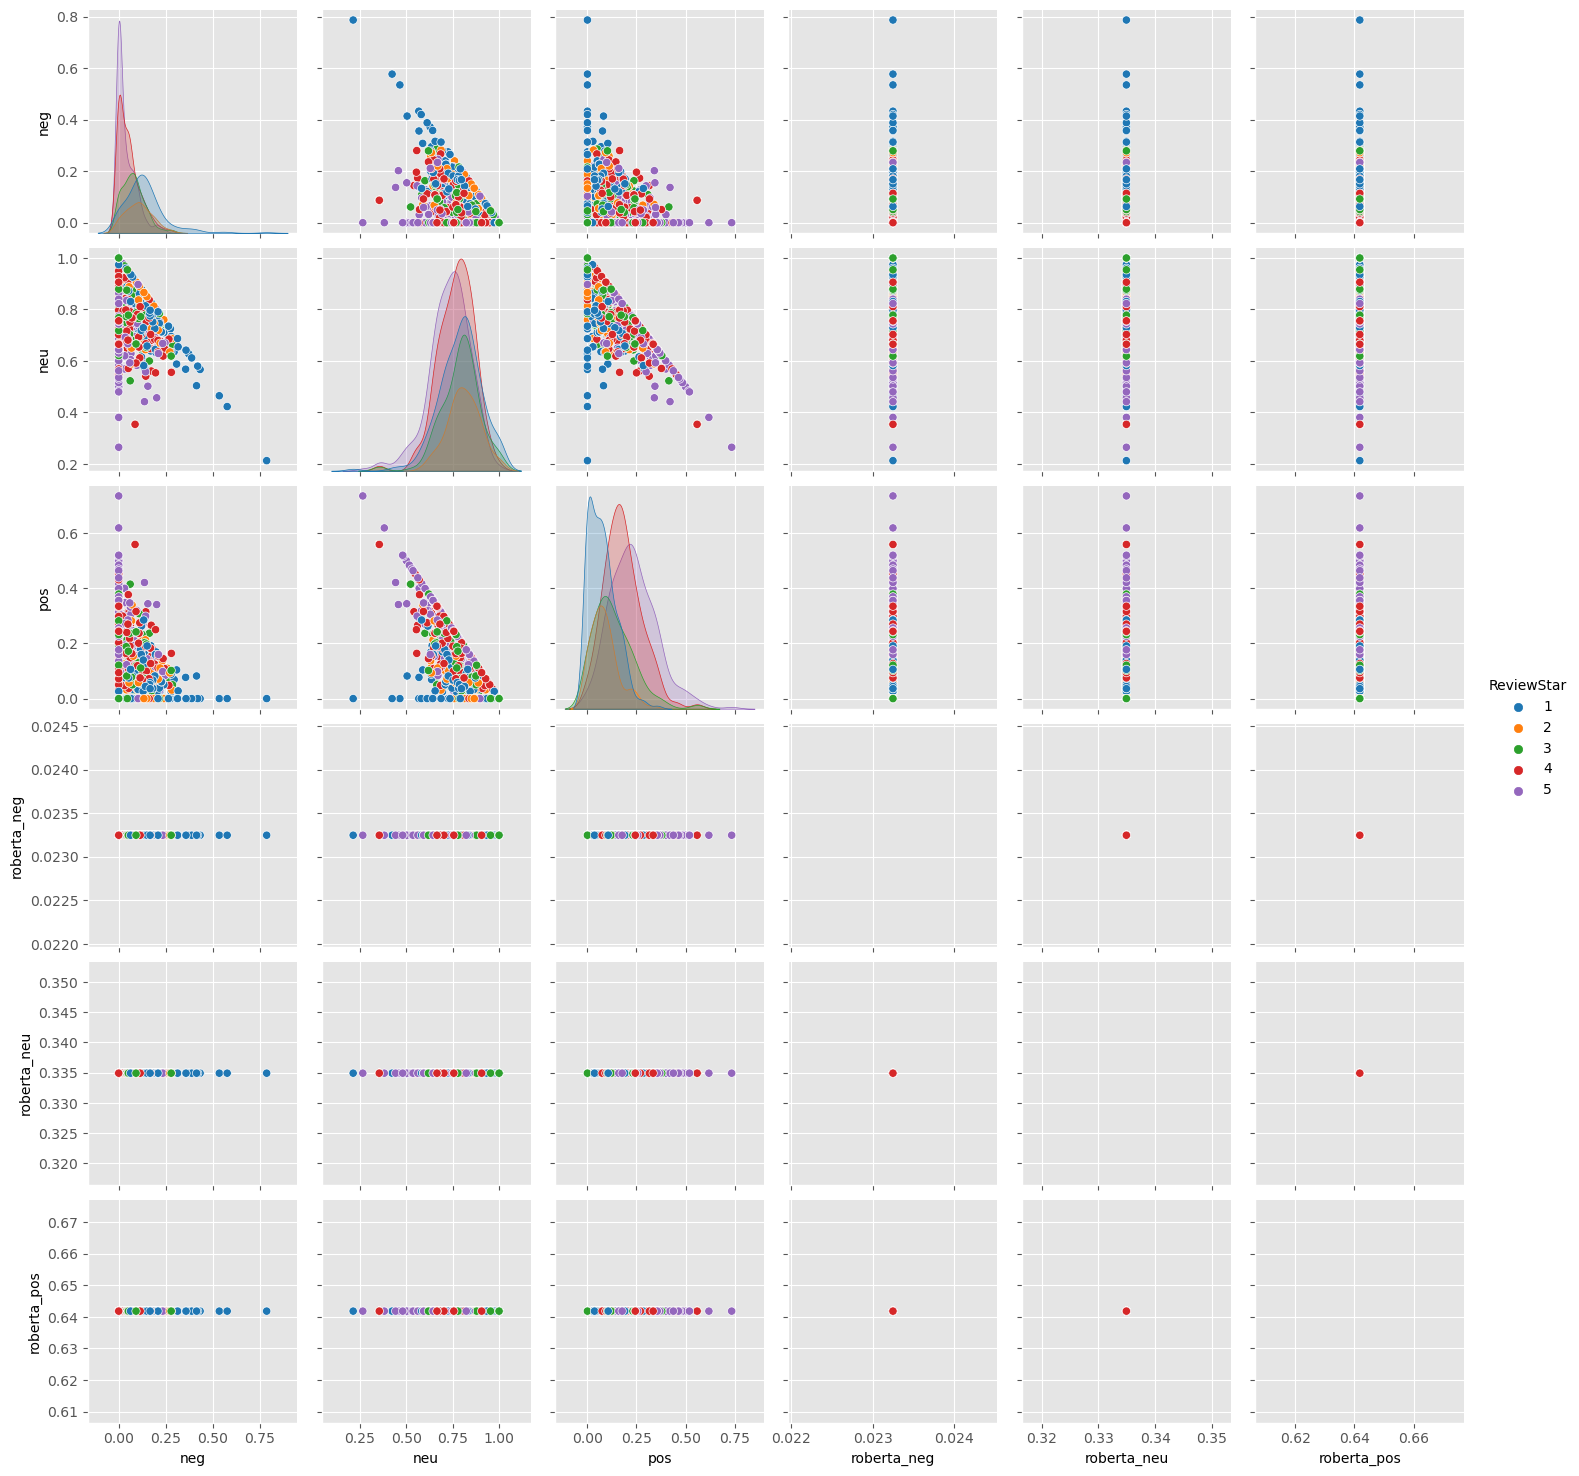

In [73]:
sns.pairplot(data=results_df, vars =['neg', 'neu', 'pos', 
                                    'roberta_neg','roberta_neu', 'roberta_pos'],
                              hue = 'ReviewStar',
                               palette = 'tab10' )
plt.show()


# STEP 5 - Review Examples

In [82]:
results_df.query('ReviewStar == 5').sort_values('roberta_pos',ascending = False)['ReviewTitle'].values[1]

'Awesome beats, just go for it.\n'

In [83]:
results_df.query('ReviewStar == 5').sort_values('pos',ascending = False)['ReviewTitle'].values[1]

'Best for music lovers for this price.\n'

In [84]:
results_df.query('ReviewStar == 5').sort_values('neg',ascending = False)['ReviewTitle'].values[1]

'Excellent for distance of 3 feet...!!!\n'

In [85]:
results_df.query('ReviewStar == 5').sort_values('roberta_neg',ascending = False)['ReviewTitle'].values[1]

'Awesome beats, just go for it.\n'

In [86]:
results_df.query('ReviewStar == 5').sort_values('roberta_neu',ascending = False)['ReviewTitle'].values[1]

'Awesome beats, just go for it.\n'

In [87]:
results_df.query('ReviewStar == 5').sort_values('neu',ascending = False)['ReviewTitle'].values[1]

'Great earphones fir bass, MIC has no noise cancellation\n'